In [1]:
import os
# read image
from imageio import imread
from scipy.misc import imresize
import numpy as np

# plotting pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [2]:
SQUARE_DIM = 224
if SQUARE_DIM:
    IMG_WIDTH = SQUARE_DIM
    IMG_HEIGHT = SQUARE_DIM
    
CHANNELS = 3

In [3]:
def show_three_images(img_rs, mask_rs, img_copy):
    fig = plt.figure()

    # show original image
    fig.add_subplot(131)
    plt.title('image')
    plt.imshow(img_rs)

    fig.add_subplot(132)
    plt.title('mask')
    plt.imshow(mask_rs)

    fig.add_subplot(133)
    plt.title('together')
    plt.imshow(img_copy)

    plt.show() 

In [4]:
root_dir = "./raw_isic_segmentation/"
raw_img_dir = os.path.join(root_dir, "ISIC2018_Task1-2_Training_Input")
raw_mask_dir = os.path.join(root_dir, "ISIC2018_Task1_Training_GroundTruth")

In [5]:
mask_ext = "_segmentation.png"
img_ext = ".jpg"
list_of_mask_file_names = os.listdir(raw_mask_dir)

# filter out .txt files
list_of_mask_file_names = [f for f in list_of_mask_file_names if f.endswith(mask_ext)]


list_of_img_ids = [name.rstrip(mask_ext) for name in list_of_mask_file_names]
list_of_img_file_names = [name+img_ext for name in list_of_img_ids]
print(len(list_of_mask_file_names), len(list_of_img_ids), len(list_of_img_file_names))
print(list_of_mask_file_names[42], list_of_img_ids[42], list_of_img_file_names[42])
total_instances_n = len(list_of_mask_file_names)

2594 2594 2594
ISIC_0007141_segmentation.png ISIC_0007141 ISIC_0007141.jpg


/home/jackburdick/anaconda3/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  
/home/jackburdick/anaconda3/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  import sys


0


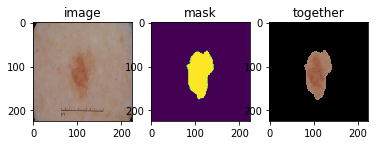

20
40
60
80
100
120
140
160
180
200


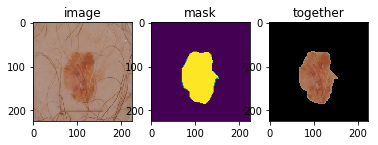

220
240
260
280
300
320
340
360
380
400


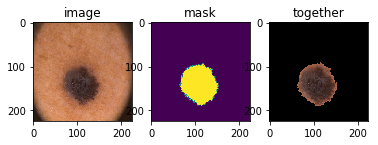

420
440
460
480
500
520
540
560
580
600


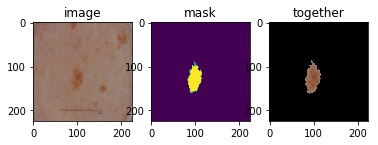

620
640
660
680
700
720
740
760
780
800


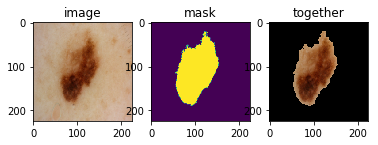

820
840
860
880
900
920
940
960
980
1000


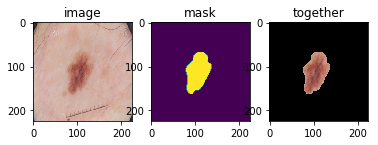

1020
1040
1060
1080
1100
1120
1140
1160
1180
1200


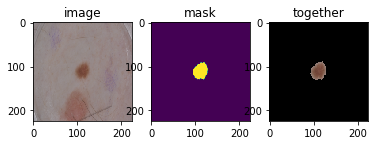

1220
1240
1260
1280
1300
1320
1340
1360
1380
1400


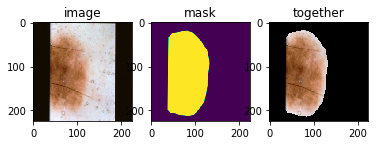

1420
1440
1460
1480
1500
1520
1540
1560
1580
1600


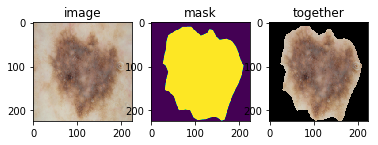

1620
1640
1660
1680
1700
1720
1740
1760
1780
1800


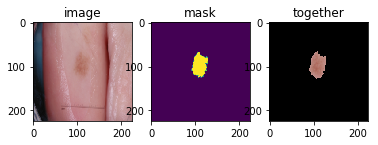

1820
1840
1860
1880
1900
1920
1940
1960
1980
2000


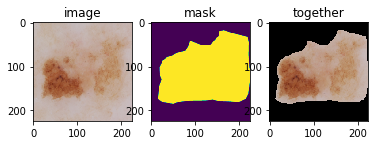

2020
2040
2060
2080
2100
2120
2140
2160
2180
2200


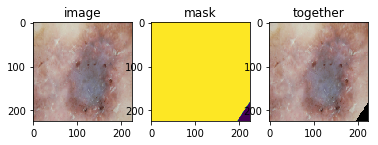

2220
2240
2260
2280
2300
2320
2340
2360
2380
2400


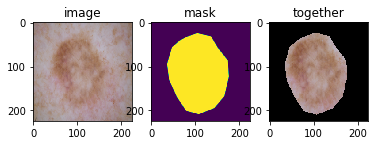

2420
2440
2460
2480
2500
2520
2540
2560
2580


In [6]:
final_imgs = np.zeros((total_instances_n, IMG_WIDTH, IMG_HEIGHT, CHANNELS), dtype='float32')
final_masks = np.zeros((total_instances_n, IMG_WIDTH, IMG_HEIGHT), dtype='float32')
for i, img_id in enumerate(list_of_img_ids):
    img = imread(os.path.join(raw_img_dir, list_of_img_file_names[i]))
    mask = imread(os.path.join(raw_mask_dir, list_of_mask_file_names[i]))
    img_rs = imresize(img, (224,224))
    mask_rs = imresize(mask, (224,224))
    img_copy = np.copy(img_rs)
    img_copy[mask_rs == 0] = [0, 0, 0]
    final_imgs[i] = img_rs
    final_masks[i] = mask_rs
    if i %20 == 0:
        print(i)
    if i % 200 == 0:
        show_three_images(img_rs, mask_rs, img_copy)

In [7]:
def maybe_create_dir(dir_path: str) -> None:
    if not os.path.exists(dir_path):
        os.makedirs(dir_path)
        print("{} created".format(dir_path))
    else:
        print("{} already exists".format(dir_path))
        
maybe_create_dir('./numpy_prep/' + str(SQUARE_DIM) + "_" + str(SQUARE_DIM))

./numpy_prep/224_224 created


In [8]:
## save image
np.save('./numpy_prep/' + str(SQUARE_DIM) + "_" + str(SQUARE_DIM) +  '/images.npy', final_imgs)
np.save('./numpy_prep/' + str(SQUARE_DIM) + "_" + str(SQUARE_DIM) + '/masks.npy', final_masks)